In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import texthero as hero
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# EDA

In [2]:
data = pd.read_csv('Suicide_Detection.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [4]:
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [5]:
data=data.drop('Unnamed: 0', axis=1)

In [6]:
data.duplicated(keep=False).sum()

0

In [7]:
data = data.rename(columns = {"class": "target"})

In [8]:
data['target'].replace('suicide','Depression',inplace=True)
data['target'].replace('non-suicide','Non-Depression',inplace=True)

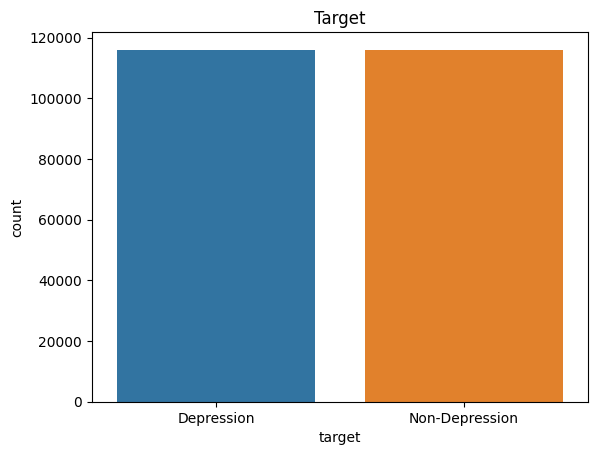

In [9]:
sns.countplot(data, x='target').set_title('Target');

In [10]:
#data=data.drop(data.index[1000:])

## Model Cleaning using TextHero

In [11]:
data['CleanText']=hero.clean(data.text)

fillna(s)

lowercase(s)

remove_digits()

remove_punctuation()

remove_diacritics() 

remove_stopwords() 

remove_whitespace() 

# Converting target to 0 and 1

In [12]:
le = preprocessing.LabelEncoder()
data['Target01'] = le.fit_transform(data.target.values)

# Switching the values (We want depressed to be 1 and non depressed to be 0)

In [13]:
data['Target01'].replace(0,2,inplace=True)
data['Target01'].replace(1,0,inplace=True)
data['Target01'].replace(2,1,inplace=True)

In [14]:
data.head()

,text,target,CleanText,Target01
0,Ex Wife Threatening SuicideRecently I left my ...,Depression,ex wife threatening suiciderecently left wife ...,1
1,Am I weird I don't get affected by compliments...,Non-Depression,weird get affected compliments coming someone ...,0
2,Finally 2020 is almost over... So I can never ...,Non-Depression,finally almost never hear bad year ever swear ...,0
3,i need helpjust help me im crying so hard,Depression,need helpjust help im crying hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",Depression,' losthello name adam ' struggling years ' afr...,1


# Splitting the data

In [15]:
X=data['CleanText']
y=data['Target01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using TF-IDF to weight words and convert them to vectors

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_test = tfidf_vectorizer.transform(X_test)

# Build Linear SVC Model

In [17]:
# We Can select any model but linearSVC has l1 norm penality which deals with sparse
lsvc = LinearSVC(C=100, penalty='l1', max_iter=500, dual=False)
lsvc.fit(X_tfidf_train, y_train)

LinearSVC(C=100, dual=False, max_iter=500, penalty='l1')

In [18]:
y_predict_tfidf = lsvc.predict(X_tfidf_test)

In [19]:
print(classification_report(y_test,y_predict_tfidf))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     34729
           1       0.93      0.92      0.93     34894

    accuracy                           0.93     69623
   macro avg       0.93      0.93      0.93     69623
weighted avg       0.93      0.93      0.93     69623



# QUICK TEST

In [20]:
datatest = pd.read_csv('testinput.csv')
datatest['input']=hero.clean(datatest['input'])
input=datatest.squeeze()
testinput = tfidf_vectorizer.transform(input)
test_predict=lsvc.predict(testinput)
test_predict

array([1, 0, 1, 1, 0, 0])

1 = Depressed 0 = Non-Depressed

# TESTRUN

In [21]:
datatest = pd.read_csv('testinput.csv')
datatest

,input
0,My wife divorced me. I want to die.
1,I am happy. I won so much money. I will go cel...
2,Thought about dying. It made me happy. I want ...
3,I am very sad. I want to die. Please someone e...
4,I am not happy. No I am joking I am very happy...
5,This model could use alot of improvement. I gu...


In [22]:
datatest['input']=hero.clean(datatest['input'])

In [23]:
datatest

,input
0,wife divorced want die
1,happy much money go celebrate excited future l...
2,thought dying made happy want experience death
3,sad want die please someone end life cant take...
4,happy joking happy want go eat food want celeb...
5,model could use alot improvement guess gotta s...


In [24]:
input=datatest.squeeze()
testinput = tfidf_vectorizer.transform(input)

In [25]:
test_predict=lsvc.predict(testinput)

In [26]:
test_predict

array([1, 0, 1, 1, 0, 0])